<a href="https://colab.research.google.com/github/Sufiyanyoonus/Statistics/blob/main/Assignment_Statiscis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

path="/content/drive/MyDrive/HOUSE_PRICE/house_price (1).csv"
df=pd.read_csv(path)
df.head(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
# cheking the data type of each column
print(df.dtypes)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [ ]:
# checking for null values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [ ]:
# to drop the duplicates from dataset
df.drop_duplicates(inplace=True)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

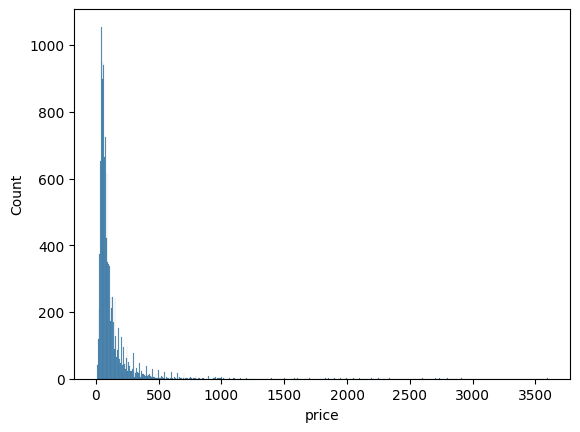

In [ ]:
sns.histplot(df["price"] )

<Axes: ylabel='price'>

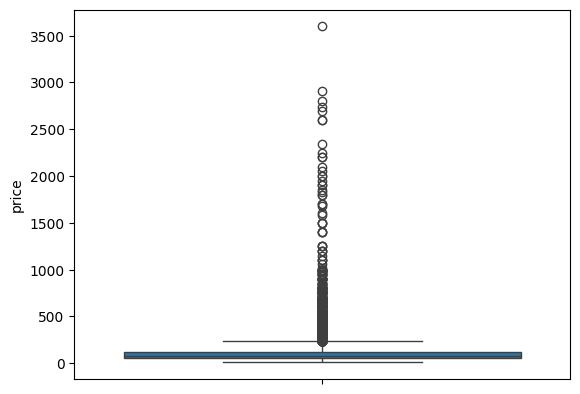

In [ ]:
sns.boxplot(df["price"] )

##z score

In [ ]:
# removing theh out layers using z score method
upper_limit=df['price'].mean()+3*df['price'].std()
lower_limit=df['price'].mean()-3*df['price'].std()
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 577.7537260854385
lower_limit -346.8110703369404


In [ ]:
# Outlaiers
df.loc[(df['price']>upper_limit)|(df['price']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,18181
61,Whitefield,4 Bedroom,5700.00,5.0,650.0,4,11403
157,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,760.0,4,20266
404,Rajaji Nagar,7 BHK,12000.00,6.0,2200.0,7,18333
435,Whitefield,4 Bedroom,11890.00,4.0,700.0,4,5887
...,...,...,...,...,...,...,...
12967,other,5 BHK,5665.84,7.0,988.0,5,17437
12976,other,4 BHK,6652.00,6.0,660.0,4,9921
13000,other,4 Bedroom,6688.00,6.0,700.0,4,10466
13078,other,4 Bedroom,9200.00,4.0,2600.0,4,28260


In [ ]:
# reomoving the out laiers
new_df=df.loc[(df['price']<upper_limit)&(df['price']>lower_limit)]
print("data without out laiers =",len(new_df))
print("data with outlaiers =",len(df))

data without out laiers = 11966
data with outlaiers = 12151


<Axes: ylabel='price'>

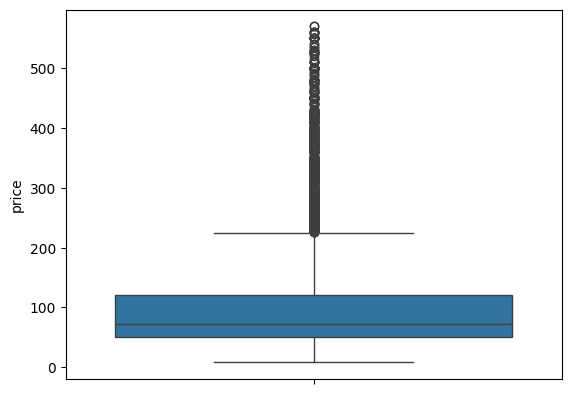

In [ ]:
# box plot of new data after outliers
sns.boxplot(new_df["price"] )

##IQR METHOD

In [ ]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1

q1,q3,iqr

(50.0, 123.5, 73.5)

In [ ]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q1 - (1.5 * iqr)

lower_limit,upper_limit

(-60.25, 233.75)

In [ ]:
# reomoving the out laiers
IQR_df=df.loc[(df['price']<upper_limit)&(df['price']>lower_limit)]
print("data without out laiers =",len(IQR_df))
print("data with outlaiers =",len(df))

data without out laiers = 10986
data with outlaiers = 12151


<Axes: ylabel='price'>

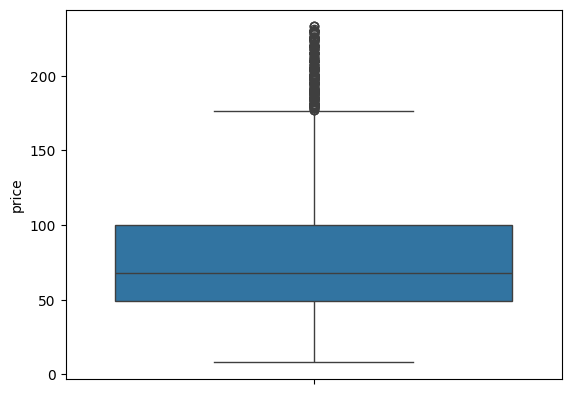

In [ ]:
# box plot of new data after outliers
sns.boxplot(IQR_df["price"] )

##percentile method

In [ ]:
upper_limit=df['price'].quantile(0.99)
lower_limit=df['price'].quantile(0.01)
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 699.5
lower_limit 19.5


In [ ]:
# reomoving the out laiers
new_df=df.loc[(df['price']<upper_limit)&(df['price']>lower_limit)]
print("data without out laiers =",len(new_df))
print("data with outlaiers =",len(df))

data without out laiers = 11904
data with outlaiers = 12151


<Axes: ylabel='price'>

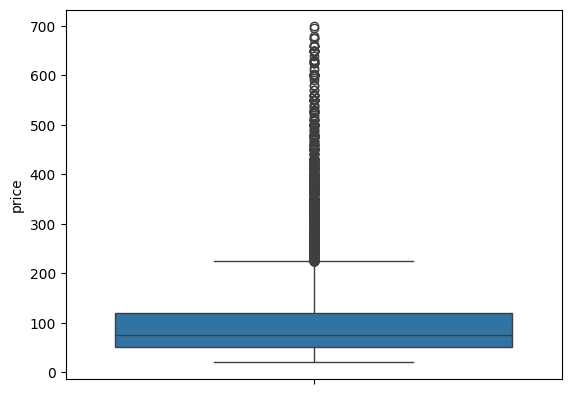

In [ ]:
# box plot of new data after outliers
sns.boxplot(new_df["price"] )

In [ ]:
# capping
new_df=df.copy()
new_df.loc[(new_df['price']>upper_limit),'price']=upper_limit
new_df.loc[(new_df['price']<lower_limit),'price']=lower_limit

<Axes: ylabel='price'>

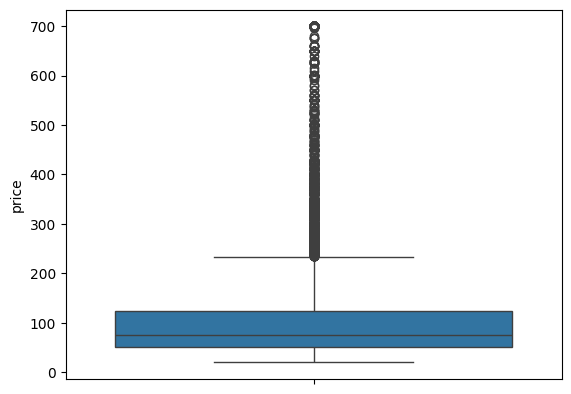

In [ ]:
# box plot of new data after outliers
sns.boxplot(new_df["price"] )

## i found that iqr  method is very effective for removing the outliers

<Axes: ylabel='price'>

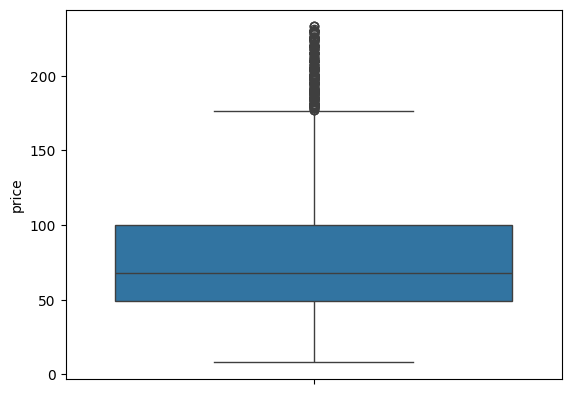

In [ ]:
# box plot of new data after outliers
sns.boxplot(IQR_df["price"] )

##Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. (Score:1)


In [8]:
# data preprocessing
# checking null values

missing_values=df.isnull().sum()
print("the missing values ",missing_values)

the missing values  location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [9]:
# remove duplicates

df.drop_duplicates()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [11]:
# detecting the outliers

q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr=q3-q1

q1,q3,iqr



(4267.0, 7317.0, 3050.0)

In [12]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q1 - (1.5 * iqr)

lower_limit,upper_limit

(-308.0, 11892.0)

In [13]:
# reomoving the out laiers
clean_data=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print("data without out laiers =",len(clean_data))
print("data with outlaiers =",len(df))

data without out laiers = 11935
data with outlaiers = 13200


<Axes: ylabel='price_per_sqft'>

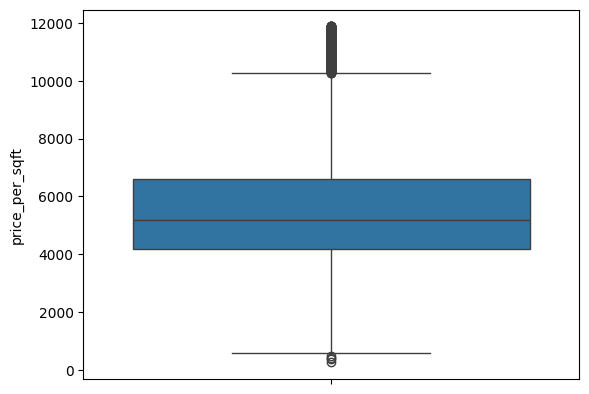

In [14]:
# hist plot of new data after outliers
sns.boxplot(clean_data["price_per_sqft"] )

<Axes: xlabel='price_per_sqft', ylabel='Count'>

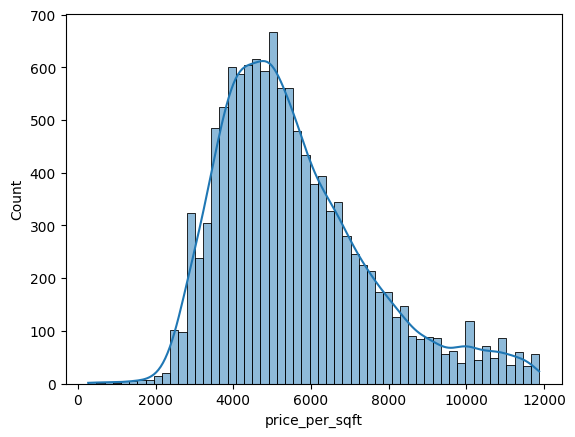

In [17]:
#Hist plot
sns.histplot(clean_data["price_per_sqft"],kde=True )

In [19]:
# skewness

clean_data["price_per_sqft"].skew() # this is slightly right skewed cause its is close to zero

0.9446919636125651

In [21]:
# to handle right skewness we use log trandromation

clean_data['price_per_sqft_log']=np.log(clean_data['price_per_sqft'])

# after log tranformation cheking the skewness

log_transformed_skewness=clean_data['price_per_sqft_log'].skew()

<ipython-input-21-1f13da422976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['price_per_sqft_log']=np.log(clean_data['price_per_sqft'])


In [23]:
log_transformed_skewness=clean_data['price_per_sqft_log'].skew()
print("the skewness after the applying log is :",log_transformed_skewness)

the skewness after the applying log is : -0.13052507558020865


In [27]:
# kurtosis
from scipy.stats import kurtosis


transformed_kurtosis = kurtosis(clean_data['price_per_sqft_log'])
print("the kurtosis after lof tranformntion is :",transformed_kurtosis)

the kurtosis after lof tranformntion is : 1.3413068520241325


<Axes: xlabel='price_per_sqft_log', ylabel='Count'>

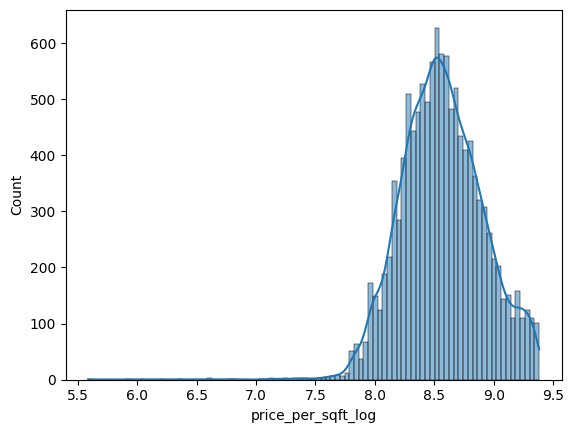

In [24]:
sns.histplot(clean_data["price_per_sqft_log"],kde=True )

##Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)


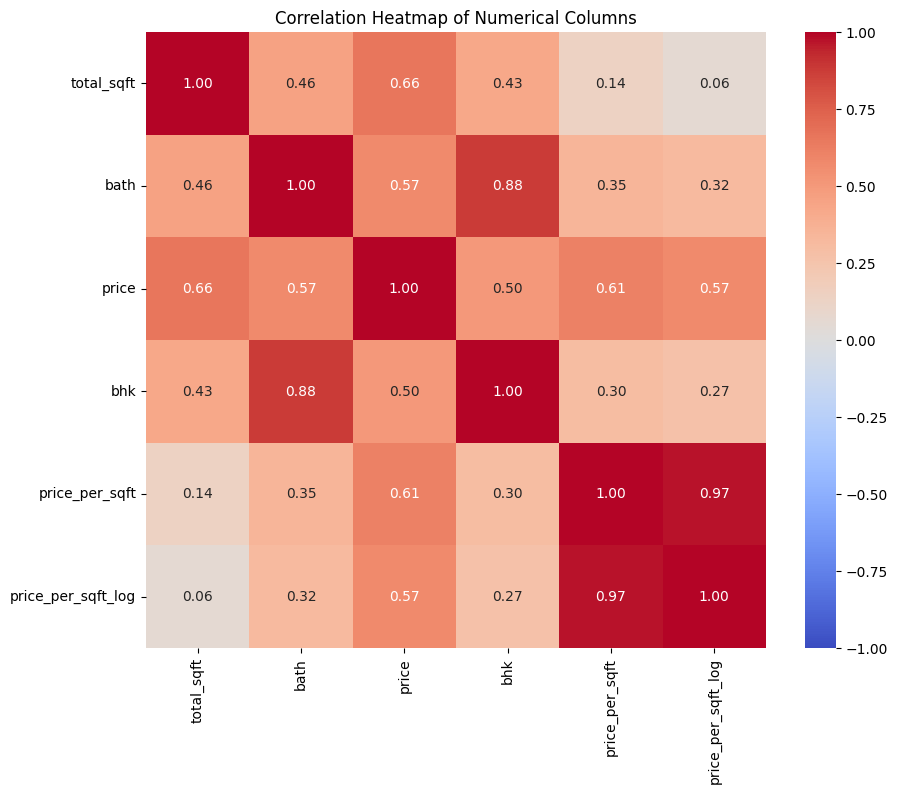

In [29]:
numerical_columns=clean_data.select_dtypes(include=["number"]) # to inckude only numerical columns

correlation_data=numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1) #plot the heat map using correleatoon
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


##Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)

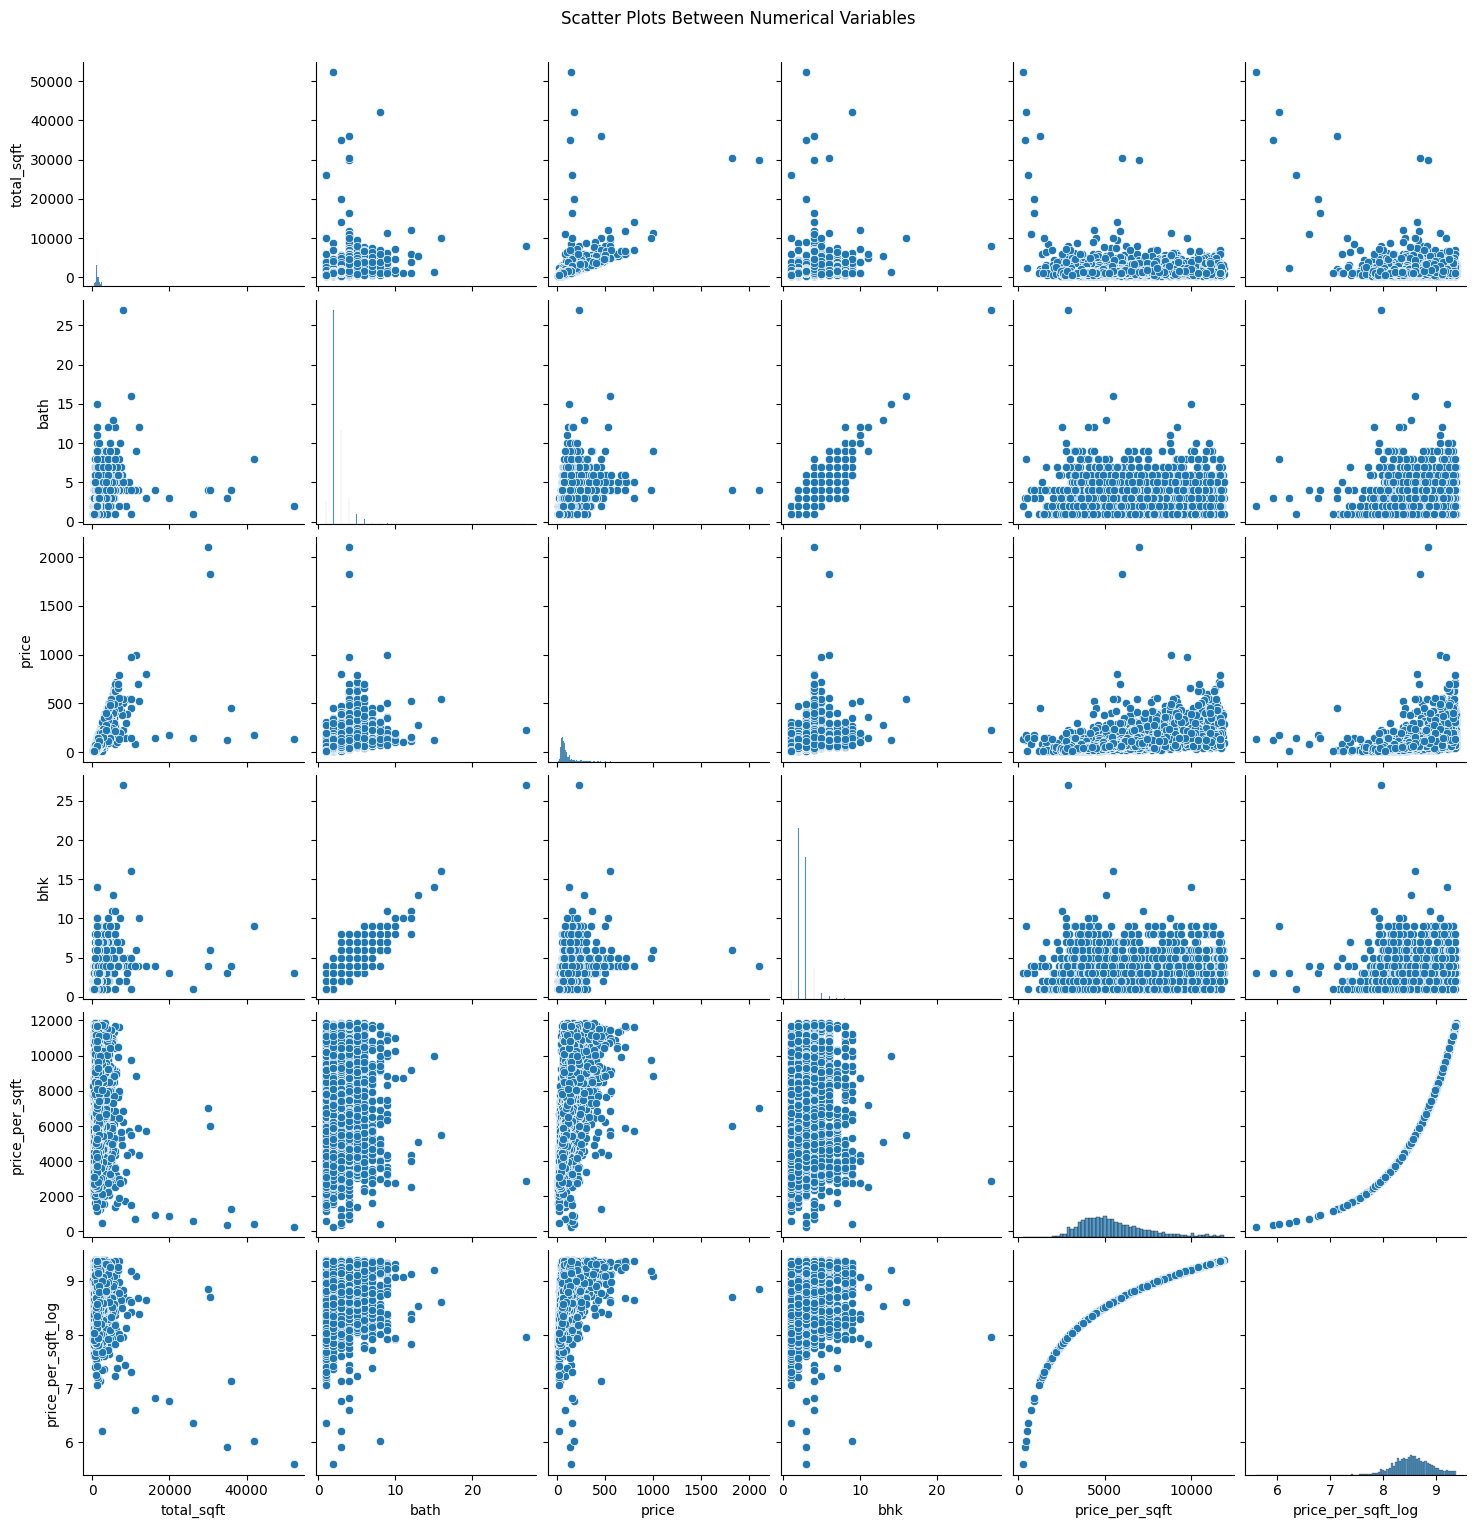

In [31]:
sns.pairplot(numerical_columns) # pair plot
plt.suptitle('Scatter Plots Between Numerical Variables', y=1.02)
plt.show()